# KKN_Iris

### Importing Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###  Loading Dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Checking if the dataset is balanced or not

<Axes: ylabel='target'>

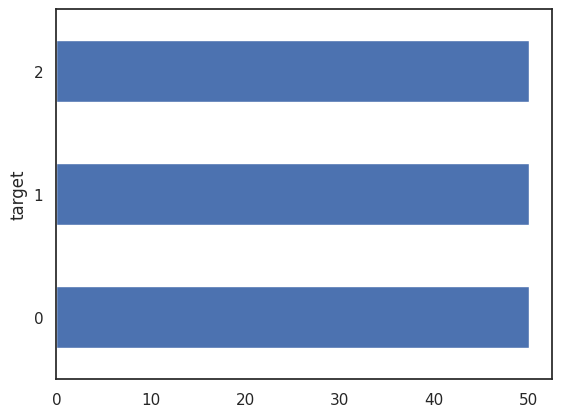

In [3]:
df.groupby('target').size().plot(kind='barh')

#### Euclidean distance function

In [4]:
def dis(a, b, p=1):
    l = len(a)
    d = 0
    for i in range(l):
        d += abs(a[i] - b[i]) ** p
    d = d ** (1/p)
    return d

- Now one test point will be executed before splitting data for train and test, it’s to check all
implementation, that have been so far.
- Here the test point that used is test_pt = [4.8, 2.7, 2.5, 0.7].
- Here after taking the test point the code will measure distance from this data point with
all those 150 data points. Then it’ll convert that list to a python DataFrame for further
convenience

In [5]:
X = df.drop('target', axis=1)
y = df.target
test_pt = [4.8, 2.7, 2.5, 0.7]
distances = []
for i in X.index:
    a = dis(test_pt, X.iloc[i])
    distances.append(a)
dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


### Distance DataFrame is sorted to measure which class the nearest

In [6]:
def knn_sort(k,dists): return dists.sort_values(by = 'dist')[:k]

In [7]:
sorted_dists = knn_sort(5, dists)
print(sorted_dists)

count_set = {}
for i in sorted_dists.index:
    if y[i] not in count_set:
        count_set[y[i]] = 1
    else:
        count_set[y[i]] += 1

print(max(count_set))

    dist
98   1.4
57   1.5
93   1.7
24   1.8
45   1.8
1


### Split the data - 75% train, 25% test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Training and predicting the test set and checking accuracy.

In [9]:
def KNN(X_train, X_test, y_train, y_test, k, p):
    y_predict = []
    for test_pt in X_test:
        distances = []
        for i in X_train:
            a = dis(test_pt, i, p)
            distances.append(a)
        dists = pd.DataFrame(data=distances, index=y_train.index, columns=['dist'])
        sorted_dists = knn_sort(k, dists)
        #print(sorted_dists)
        count_set = {}
        for i in sorted_dists.index:
            if y_train[i] not in count_set:
                count_set[y_train[i]] = 1
            else:
                count_set[y_train[i]] += 1
        y_predict.append(max(count_set))
    y = y_test.tolist()
    accr = 0
    for i in range(len(y)):
        if y[i] == y_predict[i]:
            accr += 1
    return accr/len(y)
    #print('Accuracy',accr/len(y))


### Using the KNN function

In [10]:
KNN(X_train, X_test, y_train, y_test, 5,1)

0.868421052631579

### State the best accuracy

0.9736842105263158


Text(0, 0.5, 'Accuracy (%)')

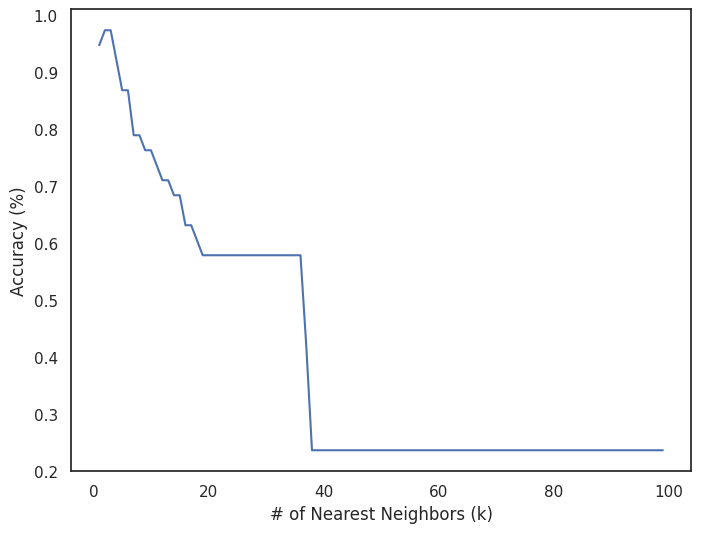

In [11]:
accuracies = []
for i in range(1,100):
    accuracies.append(KNN(X_train, X_test, y_train, y_test, i,1))

print(max(accuracies))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')


### Ratio of the Train and Test samples:

There are 112 train data sample and 38 test data samples are being considered for this
problem. So, the ratio would be –

Train data = 112*100/ (113+37) % = 75%

Test data = 38*100/(113+37)% = 25%

## Performance Analysis:


### Data Visualization

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

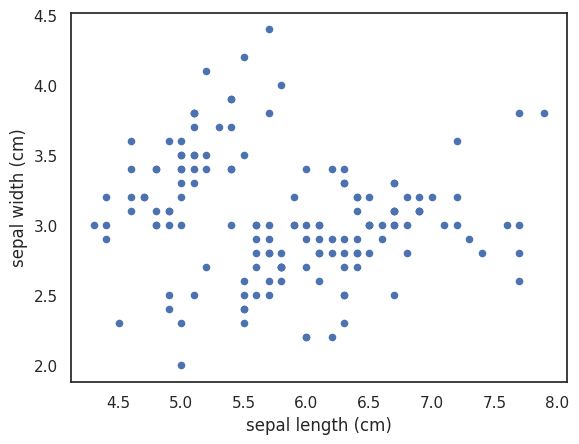

In [12]:
df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

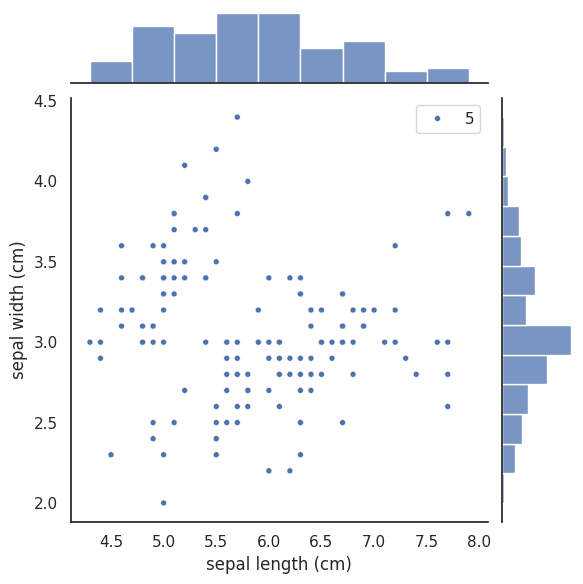

In [13]:
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=df, size=5)

<Axes: xlabel='target', ylabel='petal length (cm)'>

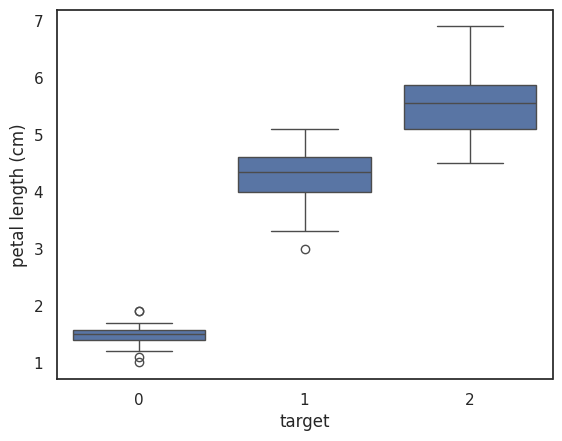

In [14]:
sns.boxplot(x="target", y="petal length (cm)", data=df)

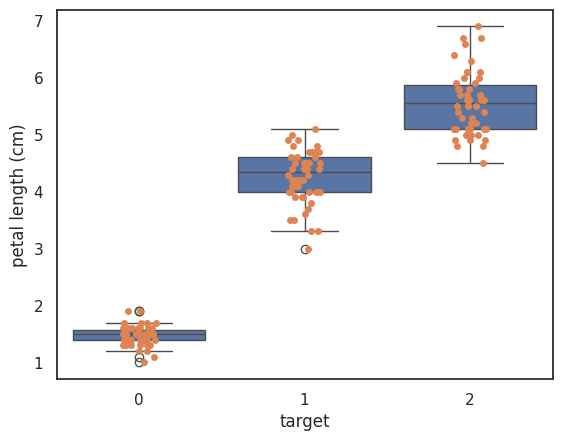

In [15]:
cx = sns.boxplot(x="target", y="petal length (cm)", data= df )
cx = sns.stripplot(x="target", y="petal length (cm)", data=df, jitter=True, edgecolor="gray")